# Initialize packages and data

In [13]:
# Lets start by importing some basic packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline

# pynwb is for reading python NWB files
import pynwb

pd.set_option('display.max_columns', None)

In [2]:
import platform
from pathlib import Path
platstring = platform.platform()

if 'Darwin' in platstring:
    # macOS 
    data_root = Path("/Volumes/Brain2023/")
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = Path("E:/")
elif ('amzn' in platstring):
    # then on CodeOcean
    data_root = Path("/data/")
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = Path("/media/$USERNAME/Brain2025/")

### Load one example session

In [3]:
example_session = 1139846596 # Other good ones to play with: 1152811536, 1069461581
this_session = str(example_session)
this_filename = f'ecephys_session_{this_session}.nwb'
nwb_path = data_root/'visual-behavior-neuropixels'/'behavior_ecephys_sessions'/this_session/this_filename
print(nwb_path)
# And read the nwb
session = pynwb.NWBHDF5IO(nwb_path).read()

/data/visual-behavior-neuropixels/behavior_ecephys_sessions/1139846596/ecephys_session_1139846596.nwb


/opt/conda/lib/python3.9/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.6.0-alpha, loaded version: 2.7.0
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)


In [4]:
# Lets take a look at the session object.
session

Data type,float64
Shape,"(569455, 2)"
Array size,8.69 MiB
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,1.0
Data type,float64
Shape,"(569455,)"
Array size,4.34 MiB
Chunk shape,None


In [5]:
# get trials
trials = session.trials.to_dataframe()
trials.head()

,start_time,stop_time,initial_image_name,change_image_name,is_change,change_time_no_display_delay,go,catch,lick_times,response_time,reward_time,reward_volume,hit,false_alarm,miss,correct_reject,aborted,auto_rewarded,change_frame,trial_length
id,,,,,,,,,,,,,,,,,,,,
0,27.66076,28.61154,im104_r,im104_r,False,NaN,False,False,[28.27695],NaN,NaN,0.0,False,False,False,False,True,False,-99,0.95078
1,29.16146,30.88003,im104_r,im104_r,False,NaN,False,False,[30.56264],NaN,NaN,0.0,False,False,False,False,True,False,-99,1.71857
2,31.41341,33.53196,im104_r,im104_r,False,NaN,False,False,"[32.7479, 32.94767, 33.21476]",NaN,NaN,0.0,False,False,False,False,True,False,-99,2.11855
3,33.66560,36.08416,im104_r,im104_r,False,NaN,False,False,[35.76732],NaN,NaN,0.0,False,False,False,False,True,False,-99,2.41856
4,36.66823,38.33614,im104_r,im104_r,False,NaN,False,False,[38.01908],NaN,NaN,0.0,False,False,False,False,True,False,-99,1.66791


In [6]:
# get stimuli
stimuli = session.intervals['Natural_Images_Lum_Matched_set_ophys_H_2019_presentations'].to_dataframe()
stimuli.head()

,start_time,stop_time,stimulus_block,image_name,duration,start_frame,end_frame,is_change,is_image_novel,omitted,flashes_since_change,trials_id,is_sham_change,stimulus_name,active,stimulus_index,rewarded,tags,timeseries
id,,,,,,,,,,,,,,,,,,,
0,27.705472,27.955683,0,im104_r,0.250212,60,75,0.0,0.0,0.0,0,0,False,Natural_Images_Lum_Matched_set_ophys_H_2019,True,-99,0.0,[stimulus_time_interval],"[(63, 15, timestamps pynwb.base.TimeSeries at ..."
1,28.456107,28.706318,0,im104_r,0.250212,105,120,0.0,0.0,0.0,1,0,False,Natural_Images_Lum_Matched_set_ophys_H_2019,True,-99,0.0,[stimulus_time_interval],"[(108, 15, timestamps pynwb.base.TimeSeries at..."
2,29.206725,29.456928,0,omitted,NaN,150,165,0.0,NaN,1.0,1,1,False,Natural_Images_Lum_Matched_set_ophys_H_2019,True,-99,0.0,[stimulus_time_interval],"[(153, 15, timestamps pynwb.base.TimeSeries at..."
3,29.957343,30.207555,0,im104_r,0.250212,195,210,0.0,0.0,0.0,2,1,False,Natural_Images_Lum_Matched_set_ophys_H_2019,True,-99,0.0,[stimulus_time_interval],"[(198, 15, timestamps pynwb.base.TimeSeries at..."
4,30.707978,30.958187,0,im104_r,0.250208,240,255,0.0,0.0,0.0,3,1,False,Natural_Images_Lum_Matched_set_ophys_H_2019,True,-99,0.0,[stimulus_time_interval],"[(243, 15, timestamps pynwb.base.TimeSeries at..."


In [7]:
# get units
units_table = session.units.to_dataframe()
units_table.head()

,PT_ratio,amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,l_ratio,local_index,max_drift,nn_hit_rate,nn_miss_rate,peak_channel_id,presence_ratio,quality,recovery_slope,repolarization_slope,silhouette_score,snr,spread,velocity_above,velocity_below,waveform_duration,spike_times,spike_amplitudes,waveform_mean
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1153690205,0.576369,61.301370,0.500000,297,364.80,-3.288139,1.885465,1.244942,43.828135,0.031664,291,26.18,0.712000,0.007792,1153687797,0.99,good,-0.026886,0.208681,0.084777,1.668842,100.0,0.529792,-0.412060,0.453266,"[4.978706099783888, 5.606636812116187, 5.67203...","[5.258530367795638e-05, 5.035715215189419e-05,...","[[0.0, 0.06210749999999991, 0.1198275000000002..."
1153690204,0.493414,116.816798,0.011591,296,187.73,-6.672418,1.581412,3.397615,83.330837,0.000211,290,30.83,0.983015,0.000585,1153687797,0.99,good,-0.068704,0.478412,0.110647,2.985683,90.0,2.197655,0.343384,0.329648,"[17.761086079091864, 19.73531117195231, 23.427...","[0.00014464103624885002, 0.0001232437919471667...","[[0.0, -0.11417250000000034, 0.366990000000000..."
1153689917,0.392061,113.863718,0.266193,11,158.62,-4.794188,32.554848,0.006637,96.626192,0.001420,11,9.25,0.994000,0.001925,1153687558,0.99,good,-0.119497,0.446882,0.140409,2.874502,20.0,0.000000,NaN,0.206030,"[4.832440043635988, 4.997472688118269, 5.17737...","[0.00010121183403697306, 0.0001656440311754964...","[[0.0, 0.6785025000000011, 0.7694700000000014,..."
1153690052,0.318786,149.869687,0.000141,144,318.03,-2.898115,5.910581,0.005656,65.988995,0.002364,141,48.88,0.965625,0.001825,1153687708,0.99,good,-0.032764,0.485802,0.125111,1.881085,100.0,-0.040879,-0.343384,0.521943,"[4.848806641987998, 4.903106415339167, 5.04063...","[0.0001602942811898057, 0.0001684167124952415,...","[[0.0, 0.02018249999999938, 0.5085599999999999..."
1153690046,0.500452,186.491955,0.000154,137,14.39,8.562108,1.954942,0.020679,159.963266,0.000039,135,8.71,0.996337,0.000303,1153687708,0.23,good,-0.074716,0.673994,0.164031,2.729600,40.0,0.686767,0.343384,0.274707,"[4129.2008248101865, 4129.206958117919, 4129.2...","[0.0001760438715969058, 0.00017667237816278424...","[[0.0, 0.2307824999999999, 0.37703249999999994..."


In [8]:
np.unique(stimuli.image_name,return_counts=True)

(array(['im005_r', 'im024_r', 'im034_r', 'im083_r', 'im087_r', 'im104_r',
        'im111_r', 'im114_r', 'omitted'], dtype=object),
 array([1130, 1196, 1082, 1148, 1318, 1224, 1044, 1030,  434]))

In [9]:
active_stimuli = stimuli[stimuli.active == True]
passive_stimuli = stimuli[stimuli.active == False]

In [10]:
# Lets take a moment to highlight my favorite numpy command!
# Get the stimulus shown for each spike trial
unq_stim,stim_id, = np.unique(active_stimuli.image_name,return_inverse = True)
print(unq_stim)
print(stim_id[:10])

['im005_r' 'im024_r' 'im034_r' 'im083_r' 'im087_r' 'im104_r' 'im111_r'
 'im114_r' 'omitted']
[5 5 8 5 5 8 5 5 5 5]


/tmp/ipykernel_59/4284106813.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap('tab10',


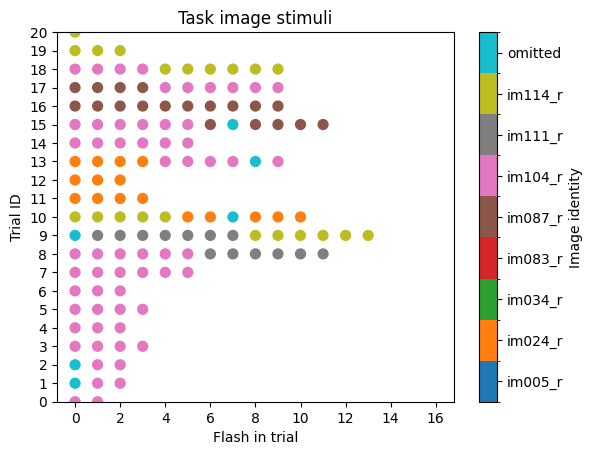

In [19]:
# Create a new plot. We need a tall one for this.
fig,ax = plt.subplots()

# This is just some fancy code to make the discrete colors work
cmap = mpl.cm.get_cmap('tab10', 
                       len(unq_stim))

norm = mpl.colors.BoundaryNorm(boundaries=np.arange(len(unq_stim)+1)-0.5,
                               ncolors=len(unq_stim))

# Count the index of each flash in each trial
_,trl_idx,trl_counts = np.unique(active_stimuli.trials_id,return_inverse=True,return_counts = True)
event_indices = np.zeros_like(trl_idx)
for i in range(len(trl_counts)):
    event_indices[trl_idx == i] = np.arange(trl_counts[i])

# The actual plotting code
z = ax.scatter(event_indices,
               trl_idx,
               s = 50,
               c = stim_id.T,
               cmap = cmap,
               norm = norm
              )

# Label stuff!
ax.set_xlabel('Flash in trial')
ax.set_ylabel('Trial ID')
ax.set_ylim([0,stimuli.trials_id.values[-1]])
ax.set_title('Task image stimuli')

# Get the color key
tick_locs = np.arange(len(unq_stim))
cbar = plt.colorbar(z, ticks=tick_locs)
cbar.set_label('Image identity')
cbar.set_ticklabels(unq_stim)

ax.set_ylim([0,20])
ax.set_yticks(np.arange(0,21));

In [20]:
electrodes_table = session.electrodes.to_dataframe()
electrodes_table.head()

,location,group,group_name,probe_vertical_position,probe_horizontal_position,probe_id,probe_channel_number,valid_data,x,y,z,imp,filtering
id,,,,,,,,,,,,,
1153687533,MRN,probeA abc.EcephysElectrodeGroup at 0x14071650...,probeA,20,43,1140043047,0,True,8632.0,3810.0,7246.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1153687534,MRN,probeA abc.EcephysElectrodeGroup at 0x14071650...,probeA,20,11,1140043047,1,True,8630.0,3799.0,7250.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1153687535,MRN,probeA abc.EcephysElectrodeGroup at 0x14071650...,probeA,40,59,1140043047,2,True,8628.0,3789.0,7253.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1153687536,MRN,probeA abc.EcephysElectrodeGroup at 0x14071650...,probeA,40,27,1140043047,3,True,8626.0,3778.0,7256.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1153687537,MRN,probeA abc.EcephysElectrodeGroup at 0x14071650...,probeA,60,43,1140043047,4,True,8625.0,3767.0,7260.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
